In [194]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [2]:
def load_csv():
    return pd.read_csv('/Users/acko068/Desktop/bank-additional/bank-additional-full.csv', sep=';')

In [3]:
df = load_csv()
df.head()
df.y.replace(('yes','no'),(1,0), inplace=True)

In [7]:
def get_train_test(df, test_size=0.2):
    y = df.y
    X = df.drop('y', axis=1)
    return train_test_split(X, y, test_size=test_size, random_state=9)

In [9]:
X_train, X_test, y_train, y_test = get_train_test(df, 0.1)

In [89]:
type(y_train)

pandas.core.series.Series

In [11]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.1, random_state=9)

In [20]:
def get_categorical_features(df):
    numeric_feature = [a for a in range(len(df.dtypes)) if df.dtypes[a] in ['int8','int64','float64']]
    return df.columns.difference(df.columns[numeric_feature])

In [21]:
get_categorical_features(X_train_2)

Index([u'contact', u'day_of_week', u'default', u'education', u'housing',
       u'job', u'loan', u'marital', u'month', u'poutcome'],
      dtype='object')

In [38]:
def label_encode(column_list, df):
    le = LabelEncoder()
    for col in column_list:
        df[col] = le.fit_transform(df[col])


In [23]:
clist = get_categorical_features(X_train_2)

In [34]:
label_encode(clist, X_train_2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [37]:
X_train_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
21579,29,0,2,6,0,0,2,0,1,3,360,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1
29517,36,7,2,3,0,2,0,0,0,1,142,2,999,1,0,-1.8,93.075,-47.1,1.405,5099.1
8462,43,4,1,3,0,2,0,1,4,3,583,1,999,0,1,1.4,94.465,-41.8,4.864,5228.1
33614,31,9,1,3,1,2,2,1,6,3,234,5,999,0,1,-1.8,92.893,-46.2,1.291,5099.1
23036,47,6,1,6,0,2,0,0,1,3,146,7,999,0,1,1.4,93.444,-36.1,4.965,5228.1


In [39]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train_2, y_train_2)


In [70]:
print(x_train_res[:, 5])

[ 0.          2.          2.         ...,  1.58363502  0.38153489  2.        ]


In [51]:
print(len(y_train_2[y_train_2==0]))
print(len(y_train_2[y_train_2==1]))
y_train_2.shape

26335
3320


(29655,)

In [52]:
print(len(y_train_res[y_train_res==0]))
print(len(y_train_res[y_train_res==1]))
y_train_res.shape

26335
26335


(52670,)

In [91]:

test_smote = pd.DataFrame(x_train_res, columns = X_test_2.columns.values)
test_y = pd.Series(y_train_res)

In [79]:
test_smote_temp = test_smote.copy()

In [107]:
test_smote["age"] = pd.qcut(test_smote["age"],4,labels=False)
# print(pd.cut(df["age"],4).value_counts())

In [94]:
a = pd.concat([test_smote_temp, test_y], axis=1)

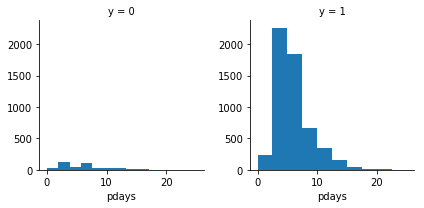

In [125]:
g = sns.FacetGrid(a[a.pdays!=999], col='y')
g.map(plt.hist, 'pdays')
plt.show()


# plt.hist(a[a.pdays!=999])
# plt.show()

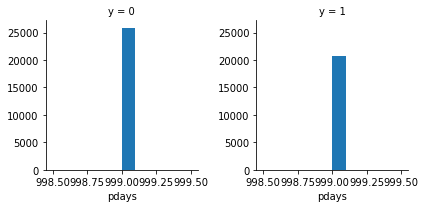

In [126]:
g = sns.FacetGrid(a[a.pdays==999], col='y')
g.map(plt.hist, 'pdays')
plt.show()

In [158]:
print(a[(a.y==1) & (a.pdays==999)].shape)
print(a[(a.y==0) & (a.pdays==999)].shape)

(20758, 21)
(25931, 21)


In [157]:
print(a[(a.y==1) & (a.pdays!=999)].shape)
print(a[(a.y==0) & (a.pdays!=999)].shape)

(5577, 21)
(404, 21)


In [169]:
test_smote["called_before"] = np.where(test_smote['pdays']==999, 0 ,1)

In [173]:
# dropped pdaya and replacing it with called_before
test_smote.drop("pdays", axis=1, inplace=True)

ValueError: labels ['pdays'] not contained in axis

In [174]:
test_smote.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,called_before
0,0,0.0,2.0,6.0,0.0,0.0,2.0,0.0,1.0,3.0,360.0,1.0,0.0,1.0,1.4,93.444,-36.1,4.963,5228.1,0
1,1,7.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,142.0,2.0,1.0,0.0,-1.8,93.075,-47.1,1.405,5099.1,0
2,2,4.0,1.0,3.0,0.0,2.0,0.0,1.0,4.0,3.0,583.0,1.0,0.0,1.0,1.4,94.465,-41.8,4.864,5228.1,0
3,0,9.0,1.0,3.0,1.0,2.0,2.0,1.0,6.0,3.0,234.0,5.0,0.0,1.0,-1.8,92.893,-46.2,1.291,5099.1,0
4,2,6.0,1.0,6.0,0.0,2.0,0.0,0.0,1.0,3.0,146.0,7.0,0.0,1.0,1.4,93.444,-36.1,4.965,5228.1,0


In [176]:
# dropping duration as it is highly correlated and we cannot know it beforehand
test_smote.drop("duration", axis=1, inplace=True)

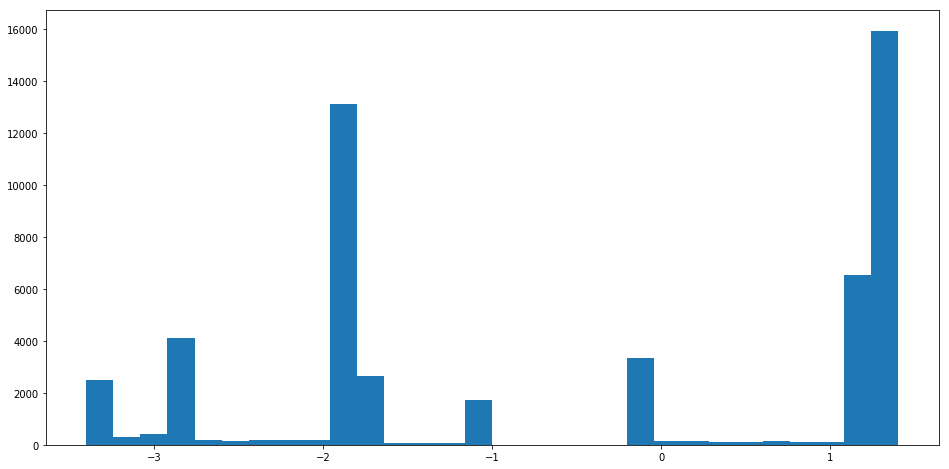

In [180]:
plt.figure(figsize=(16, 8))
plt.hist(test_smote["emp.var.rate"], bins=30)
plt.show()

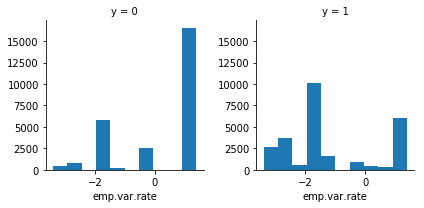

In [185]:
g = sns.FacetGrid(a, col='y')
g.map(plt.hist, 'emp.var.rate')
plt.show()

/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


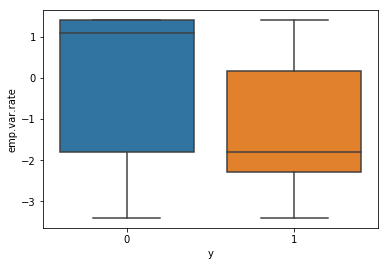

In [188]:
sns.boxplot(x = 'y', y ='emp.var.rate', data = a)

In [190]:
# dropping nr.employed as it is highly correlated with uriborm3
test_smote.drop("nr.employed", axis=1, inplace=True)

ValueError: labels ['nr.employed'] not contained in axis

/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


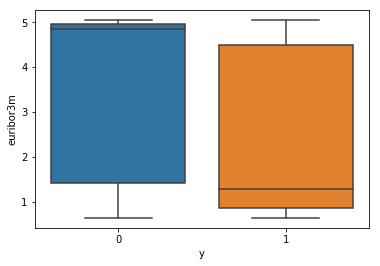

In [193]:
test_smote["euribor3m"].value_counts()
sns.boxplot(x = 'y', y ='euribor3m', data = a)

In [195]:
rf = RandomForestClassifier()
rf.fit(test_smote, test_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)